# Sobre-amostragem (Oversampling) e Subamostragem (Undersampling): Equilibrando Classes em Dados Desbalanceados

## O que são dados desbalanceados?

Em muitos conjuntos de dados, especialmente em problemas de classificação, as classes não possuem a mesma quantidade de exemplos. Isso significa que uma classe pode ter muitos mais exemplos do que outra. Essa desproporção é conhecida como desbalanceamento de classes e pode prejudicar a performance de modelos de machine learning, pois eles tendem a ser enviesados para a classe majoritária.

## Por que é importante lidar com o desbalanceamento de classes?

- Baixa acurácia para a classe minoritária: Modelos treinados em dados desbalanceados tendem a ter alta acurácia geral, mas baixa acurácia para a classe minoritária.
- Custos desiguais de classificação: Em muitos casos, o custo de classificar erroneamente um exemplo da classe minoritária é maior do que o custo de classificar erroneamente um exemplo da classe majoritária.

## Técnicas de Sobre-amostragem e Subamostragem

Para lidar com o desbalanceamento de classes, são utilizadas técnicas de reamostragem, que visam equilibrar as classes. As duas técnicas mais comuns são a sobre-amostragem e a subamostragem.

### Sobre-amostragem (Oversampling):<br>
* Conceito: Consiste em aumentar o número de exemplos da classe minoritária, duplicando aleatoriamente os exemplos existentes ou gerando novos exemplos sintéticos.
<br><br>
* Técnicas:<br><br>
1.   Remoção aleatória: A maneira mais simples, mas pode levar à perda de informações importantes.<br><br>
2.   Tomek links: Remove os pares de exemplos de classes diferentes que estão mais próximos entre si.<br><br>
3. ENN (Edited Nearest Neighbors): Remove os exemplos da classe majoritária que são classificados incorretamente pelos seus vizinhos mais próximos.

<br><br>

##Quando usar cada técnica?

- Sobre-amostragem: É mais indicada quando o conjunto de dados da classe minoritária é pequeno e há poucas informações sobre essa classe.<br><br>
- Subamostragem: É mais indicada quando o conjunto de dados da classe majoritária é muito grande e a remoção de alguns exemplos não causa perda significativa de informação.<br><br>

### Considerações importantes:

- Combinação de técnicas: Em alguns casos, a combinação de sobre-amostragem e subamostragem pode levar a melhores resultados.<br><br>
- Outras técnicas: Existem outras técnicas mais avançadas, como o balanceamento de custos e o uso de algoritmos de aprendizado que lidam naturalmente com dados desbalanceados.<br><br>
- Avaliação da performance: É fundamental avaliar a performance dos modelos utilizando métricas adequadas, como a precisão, o recall e a F1-score, para cada classe.




## Em resumo:

### A escolha da técnica de reamostragem adequada depende das características do conjunto de dados e do problema específico. É importante experimentar diferentes técnicas e avaliar a performance dos modelos para encontrar a melhor solução.<br><br>

### Gostaria de saber mais sobre alguma dessas técnicas ou sobre como aplicá-las em um problema específico?<br><br>

### Palavras-chave: desbalanceamento de classes, oversampling, undersampling, SMOTE, ADASYN, Tomek links, ENN, machine learning.<br><br>

### Observação: As informações aqui apresentadas são de caráter geral e podem variar dependendo do contexto e dos dados. Recomenda-se consultar a literatura especializada para uma compreensão mais aprofundada das técnicas de reamostragem.

# Exemplo Prático de Sobre-amostragem e Subamostragem com Scikit-learn

- Entendendo o Problema:

Vamos considerar um problema de classificação binária onde queremos prever se um cliente irá cancelar sua assinatura de um serviço de streaming. Imagine que temos um conjunto de dados com muitos mais clientes que não cancelaram (classe majoritária) do que clientes que cancelaram (classe minoritária).

# Importando as Bibliotecas:

In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

## Gerando Dados Sintéticos Desbalanceados:


In [2]:
# Gerando dados sintéticos desbalanceados
X, y = make_classification(n_samples=1000, n_features=20, weights=[0.9, 0.1], random_state=42)

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Aplicando Sobre-amostragem com SMOTE:



In [3]:
# Inicializando o SMOTE
smote = SMOTE(random_state=42)

# Aplicando o SMOTE aos dados de treino
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Treinando o modelo
model = RandomForestClassifier(random_state=42)
model.fit(X_train_smote, y_train_smote)

# Fazendo previsões e avaliando o modelo
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       180
           1       0.72      0.65      0.68        20

    accuracy                           0.94       200
   macro avg       0.84      0.81      0.83       200
weighted avg       0.94      0.94      0.94       200



## Aplicando Subamostragem Aleatória:

In [4]:
# Inicializando o RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Aplicando o RandomUnderSampler aos dados de treino
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

# Treinando o modelo
model = RandomForestClassifier(random_state=42)
model.fit(X_train_rus, y_train_rus)

# Fazendo previsões e avaliando o modelo
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.88      0.93       180
           1       0.43      0.80      0.56        20

    accuracy                           0.88       200
   macro avg       0.70      0.84      0.74       200
weighted avg       0.92      0.88      0.89       200



## Explicando o Código:

1. Geração de dados: Criamos um conjunto de dados sintético com desbalanceamento de classes.
2. Divisão dos dados: Separamos os dados em conjuntos de treinamento e teste.
3. Sobre-amostragem com SMOTE:
- Criamos instâncias sintéticas da classe minoritária para equilibrar as classes.
- Treinamos um modelo de Random Forest com os dados balanceados.
4. Subamostragem aleatória:
- Removemos aleatoriamente instâncias da classe majoritária para equilibrar as classes.
- Treinamos um modelo de Random Forest com os dados balanceados.
5. Avaliação: Utilizamos o classification_report para avaliar a performance dos modelos, incluindo métricas como precisão, recall e F1-score.

## Observações:

- Escolha da técnica: A escolha entre sobre-amostragem e subamostragem depende do problema específico e do conjunto de dados.
- Outras técnicas: Existem outras técnicas de sobre-amostragem e subamostragem disponíveis no imblearn.
- Combinação de técnicas: Em alguns casos, a combinação de diferentes técnicas pode melhorar os resultados.
- Hyperparameter tuning: É importante ajustar os hiperparâmetros do modelo e das técnicas de reamostragem para obter os melhores resultados.

Próximos Passos:

- Experimente com outros algoritmos: Além do Random Forest, você pode experimentar com outros algoritmos como SVM, Naive Bayes, etc.
- Avalie diferentes métricas: Além do classification_report, você pode utilizar outras métricas como a curva ROC e a área sob a curva (AUC).
- Considere o custo de cada erro: Em alguns casos, o custo de classificar erroneamente um exemplo da classe minoritária é maior do que o custo de classificar erroneamente um exemplo da classe majoritária.
- Explore outras técnicas: Além do SMOTE e do RandomUnderSampler, existem outras técnicas como ADASYN, Tomek links, etc.

# Lembre-se: O tratamento de dados desbalanceados é um desafio comum em machine learning. A escolha da técnica adequada e a avaliação cuidadosa dos resultados são essenciais para obter modelos robustos e confiáveis.

Erro médio quadrático (MSE): 7.888609052210118e-31


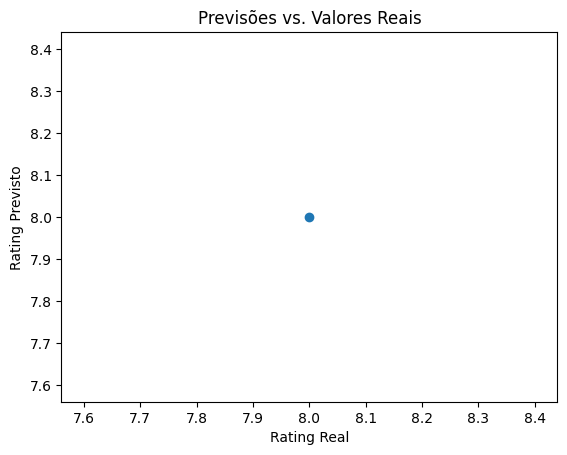

In [5]:
# prompt: Gere um código usando Scikit Learn para uma avaliação de filmes
# gere um exemplo de gráfico

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Criando um conjunto de dados de exemplo
data = {
    'budget': [10, 20, 15, 30, 25],
    'marketing': [5, 10, 7, 15, 12],
    'rating': [7.5, 8.0, 7.0, 8.5, 8.2]
}

df = pd.DataFrame(data)

# Separando as variáveis independentes (X) da variável dependente (y)
X = df[['budget', 'marketing']]
y = df['rating']

# Dividindo os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinando o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliando o modelo
mse = mean_squared_error(y_test, y_pred)
print(f'Erro médio quadrático (MSE): {mse}')

# Criando um gráfico de dispersão das previsões vs. valores reais
plt.scatter(y_test, y_pred)
plt.xlabel('Rating Real')
plt.ylabel('Rating Previsto')
plt.title('Previsões vs. Valores Reais')
plt.show()
